In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import joblib
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap
import scikitplot as skplt
from sklearn import model_selection

In [31]:
%matplotlib inline
# figure(figsize=(10, 8))
plt.rcParams["figure.figsize"] = (16,10)

In [12]:
def cal_acc(result, test):
    count = 0
    for i in range(len(result)):
        if result[i] == test_y[i]:
            count += 1
    acc = round((count/len(result))*100, 2)
    print(f'Correct Predictions : {count}\nIncorrect Predictions : {len(result) - count}\nAccuracy = {acc}%')
    return acc

In [13]:
def evsp_graph(expected, predicted):
    expected_count = [0]*26
    predicted_count = [0]*26
    
    for i in range(len(expected)): expected_count[expected[i]] += 1
    for i in range(len(predicted)): predicted_count[predicted[i]] += 1
    
    df = pd.DataFrame({"Expected" : expected_count, "Predicted" : predicted_count})
    # print(df)
    graph = df.plot.bar(title='Expected vs Predicted')
    graph.set_xlabel('Categories')
    graph.set_ylabel('Occurence Count')
    # graph.bar()

In [39]:
def metrics(confusion_matrix):
    x = [i for i in range(25) if i != 9]
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    print('\nFalse Positive:\n', FP)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    print('\nFalse Negative:\n', FN)
    TP = np.diag(confusion_matrix)
    print('\nTrue Positive:\n', TP)
    TN = confusion_matrix.sum() - (FP + FN + TP)
    print('\nTrue Negative:\n', TN)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('\nTrue Positive Rate:\n', TPR)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    print('\nTrue Negative Rate:\n', TNR)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('\nPositive Predictive Value:\n', PPV)
    # Negative predictive value
    NPV = TN/(TN+FN)
    print('\nNegative Predictive Value:\n', NPV)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print('\nFalse Positive Rate:\n', FPR)
    # False negative rate
    FNR = FN/(TP+FN)
    print('\nFalse Negative Rate:\n', FNR)
    # False discovery rate
    FDR = FP/(TP+FP)
    print('\nFalse Discovery Rate:\n', FDR)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('\nOverall Accuracy:\n', ACC)
    
    plt.subplot(221)
    plt.bar(x, FP)
    plt.title('False Posititve')
    plt.subplot(222)
    plt.bar(x, FN)
    plt.title('False Negative')
    plt.subplot(223)
    plt.bar(x, TP)
    plt.title('True Positive')
    plt.subplot(224)
    plt.bar(x, TN)
    plt.title('True Negative')
    plt.show()

In [49]:
path = r'E:\Desktop\ML College\Hand-Sign-Recognition'

data = pd.read_csv(f'{path}\\sign_mnist_train.csv')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
print(X.shape)

test = pd.read_csv(f'{path}\\sign_mnist_test.csv')
test_X = test.iloc[:, 1:].values
test_y = test.iloc[:, 0].values
print(test_X.shape)

(27455, 784)
(7172, 784)


# Loading the models

## Random Forest Model

In [50]:
rfc = joblib.load(f'{path}\\rfc.pkl')
print('rfc loaded')

rfc loaded


In [51]:
# Predict Results
rfc_predicted = rfc.predict(test_X)
# Calculate Accuracy
rfc_acc = cal_acc(rfc_predicted, test_y)

Correct Predictions : 5952
Incorrect Predictions : 1220
Accuracy = 82.99%


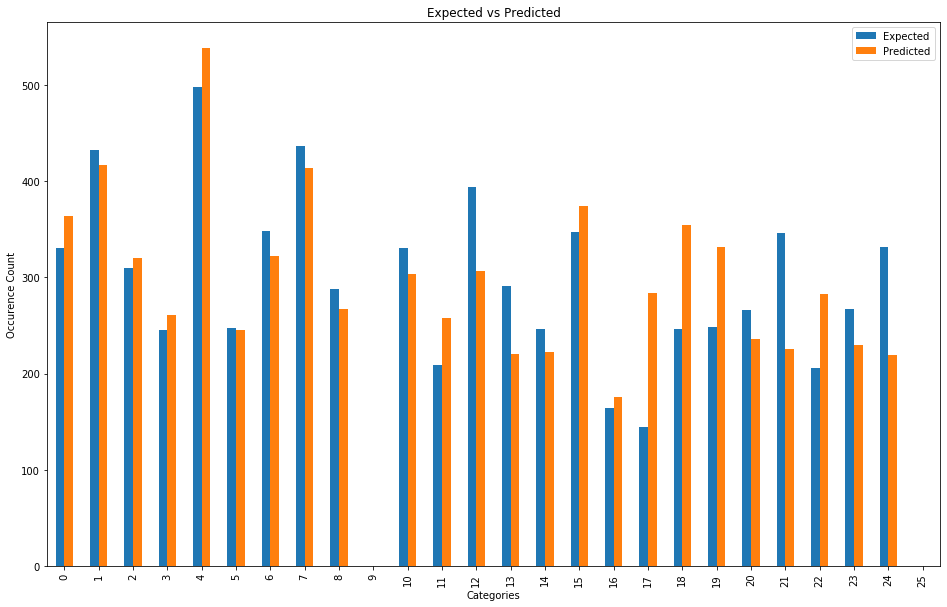

In [52]:
# Comparison graph for each category
evsp_graph(test_y, rfc_predicted)

In [53]:
# Classification report
result = classification_report(test_y, rfc_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       331
           1       0.97      0.94      0.95       432
           2       0.97      1.00      0.98       310
           3       0.92      0.98      0.95       245
           4       0.90      0.97      0.93       498
           5       0.92      0.91      0.92       247
           6       0.93      0.86      0.90       348
           7       0.99      0.94      0.96       436
           8       0.85      0.79      0.82       288
          10       0.75      0.69      0.72       331
          11       0.81      1.00      0.90       209
          12       0.88      0.69      0.77       394
          13       0.84      0.64      0.72       291
          14       0.99      0.89      0.94       246
          15       0.93      1.00      0.96       347
          16       0.93      1.00      0.96       164
          17       0.30      0.60      0.40       144
          18       0.60    

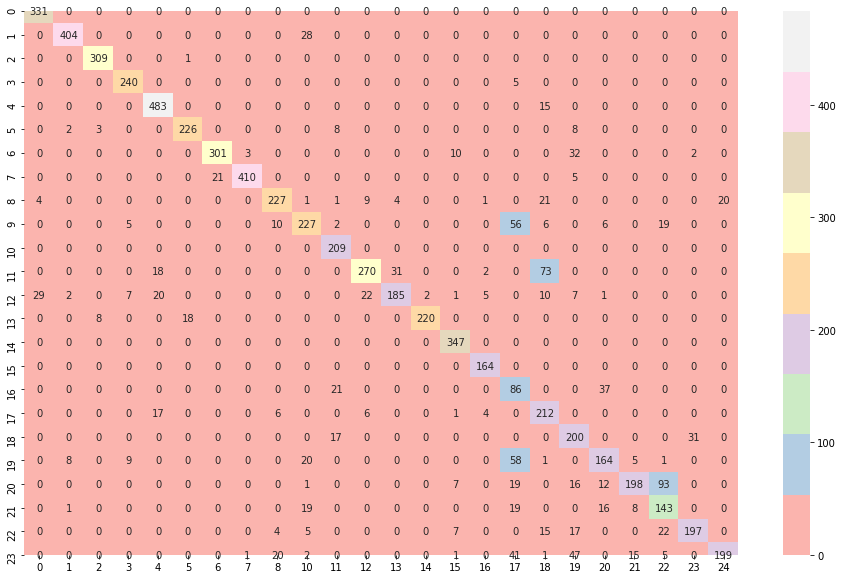

In [54]:
# confusion matrix
rfc_cm = confusion_matrix(test_y, rfc_predicted)
rfc_cm = pd.DataFrame(rfc_cm, columns=[x for x in range(25) if x != 9])
heatmap(rfc_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [ 33  13  11  21  55  19  21   4  40  76  49  37  35   2  27  12 198 142
 132  72  28 140  33  20]

False Negative:
 [  0  28   1   5  15  21  47  26  61 104   0 124 106  26   0   0  58  34
  48 102 148  63  70 133]

True Positive:
 [331 404 309 240 483 226 301 410 227 227 209 270 185 220 347 164  86 212
 200 164 198 143 197 199]

True Negative:
 [6808 6727 6851 6906 6619 6906 6803 6732 6844 6765 6914 6741 6846 6924
 6798 6996 6830 6784 6792 6834 6798 6826 6872 6820]

True Positive Rate:
 [1.         0.93518519 0.99677419 0.97959184 0.96987952 0.91497976
 0.86494253 0.94036697 0.78819444 0.6858006  1.         0.68527919
 0.63573883 0.89430894 1.         1.         0.59722222 0.86178862
 0.80645161 0.61654135 0.57225434 0.69417476 0.73782772 0.59939759]

True Negative Rate:
 [0.99517614 0.99807122 0.99839697 0.99696838 0.99175907 0.99725632
 0.99692263 0.99940618 0.99418942 0.98889051 0.9929628  0.99454116
 0.99491353 0.99971123 0.99604396 0.99828767 0.97182698 0.97949

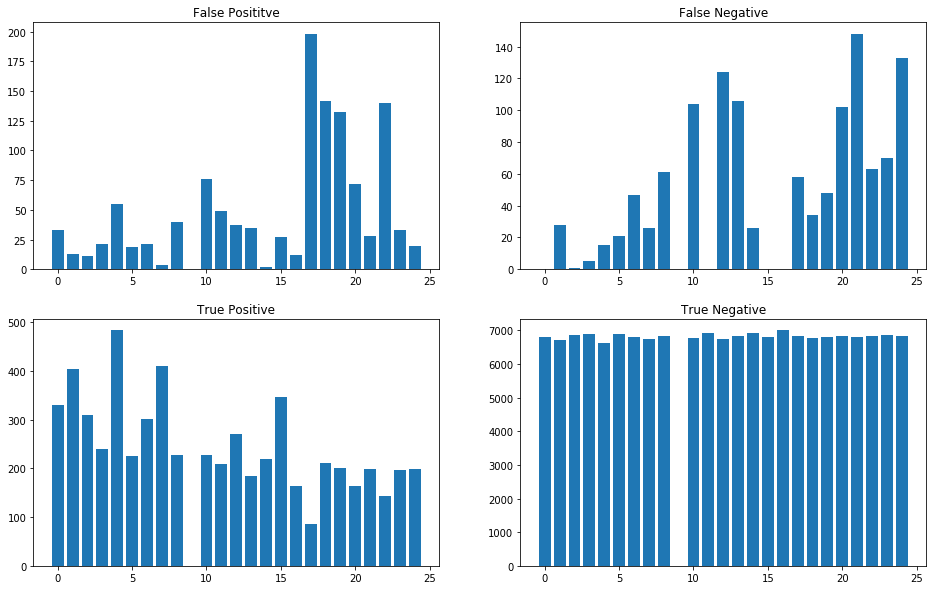

In [55]:
# Various Metrics
metrics(confusion_matrix(test_y, rfc_predicted))

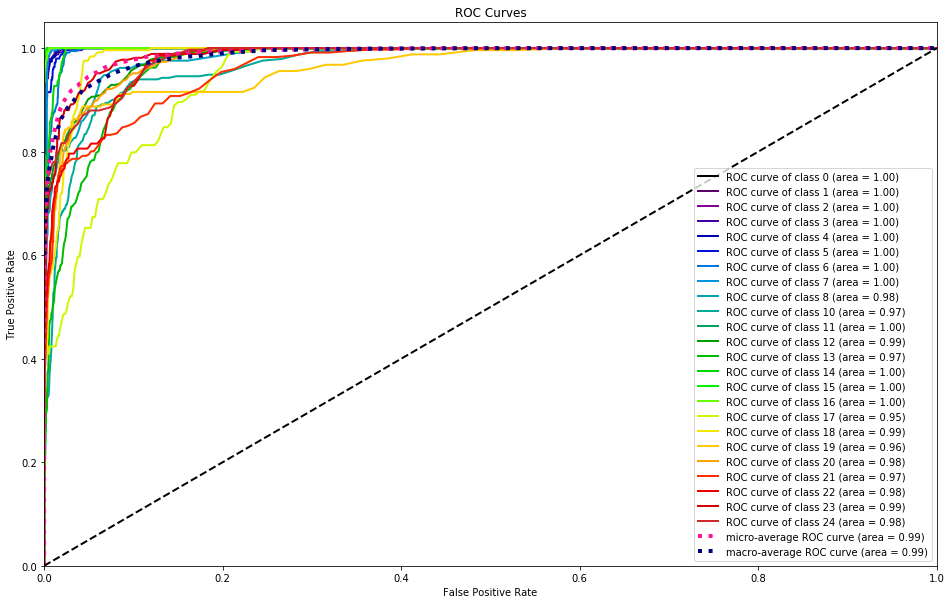

In [56]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, rfc.predict_proba(test_X))

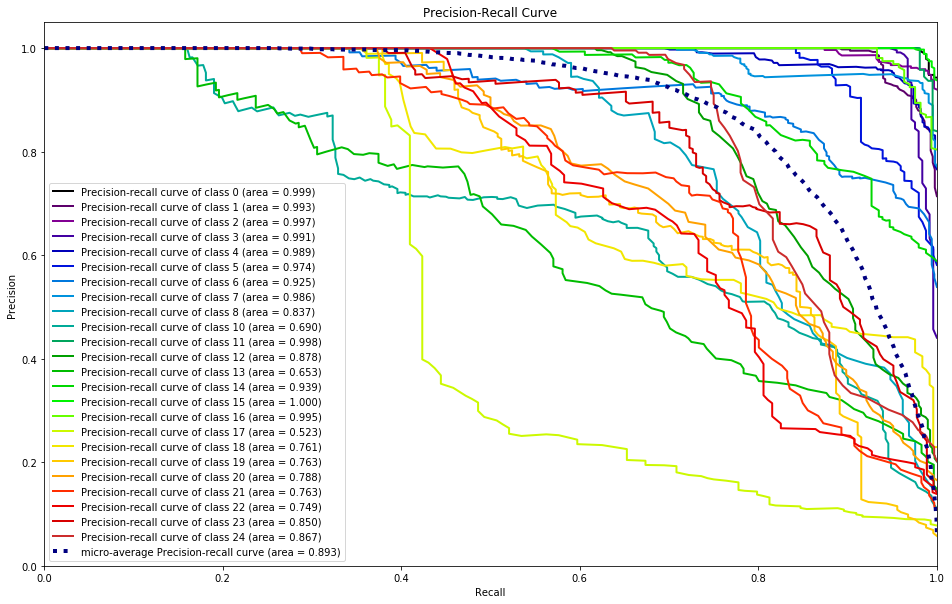

In [57]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, rfc.predict_proba(test_X))

## ADA Boost

In [58]:
abc = joblib.load(f'{path}\\abc.pkl')
print('abc loaded')

abc loaded


In [59]:
# Predict Results
abc_predicted = abc.predict(test_X)
# Calculate Accuracy
abc_acc = cal_acc(abc_predicted, test_y)

Correct Predictions : 1868
Incorrect Predictions : 5304
Accuracy = 26.05%


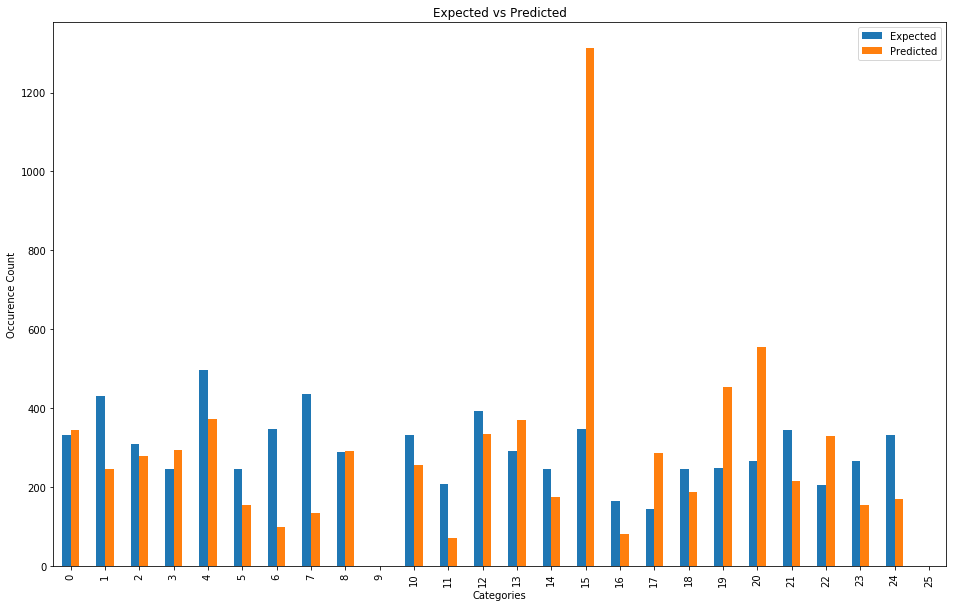

In [60]:
# Comparison graph for each category
evsp_graph(test_y, abc_predicted)

In [61]:
# Classification report
result = classification_report(test_y, abc_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.34      0.36      0.35       331
           1       0.53      0.30      0.38       432
           2       0.56      0.51      0.53       310
           3       0.26      0.31      0.29       245
           4       0.60      0.45      0.52       498
           5       0.19      0.12      0.14       247
           6       0.67      0.19      0.30       348
           7       0.57      0.18      0.27       436
           8       0.09      0.09      0.09       288
          10       0.15      0.11      0.13       331
          11       0.38      0.13      0.19       209
          12       0.14      0.12      0.13       394
          13       0.12      0.15      0.13       291
          14       0.33      0.24      0.28       246
          15       0.24      0.92      0.39       347
          16       0.55      0.27      0.37       164
          17       0.08      0.15      0.10       144
          18       0.14    

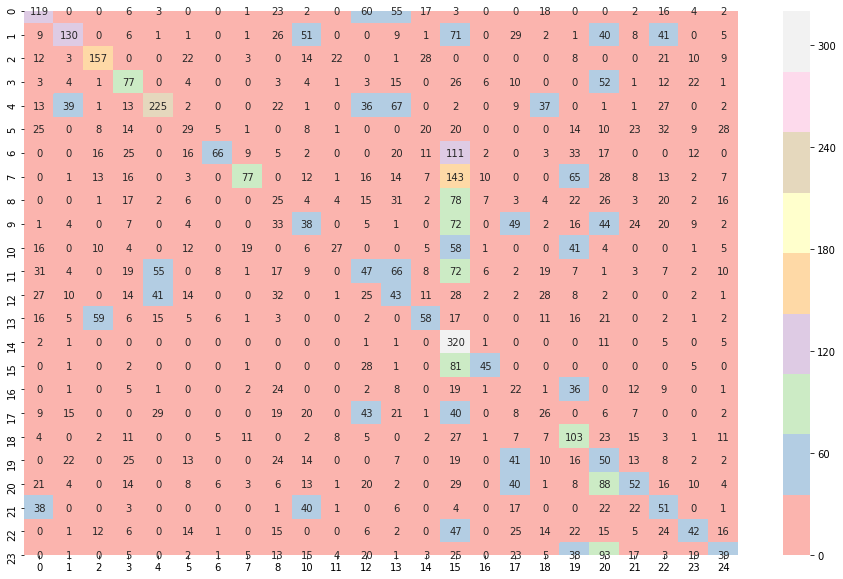

In [62]:
# confusion matrix
abc_cm = confusion_matrix(test_y, abc_predicted)
abc_cm = pd.DataFrame(abc_cm, columns=[x for x in range(25) if x != 9])
heatmap(abc_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [227 116 123 218 147 126  32  58 266 217  44 287 328 116 992  37 265 162
 351 504 164 279 113 132]

False Negative:
 [212 302 153 168 273 218 282 359 263 293 182 347 248 188  27 119 122 220
 145 216 294 155 225 293]

True Positive:
 [119 130 157  77 225  29  66  77  25  38  27  47  43  58 320  45  22  26
 103  50  52  51  42  39]

True Negative:
 [6614 6624 6739 6709 6527 6799 6792 6678 6618 6624 6919 6491 6553 6810
 5833 6971 6763 6764 6573 6402 6662 6687 6792 6708]

True Positive Rate:
 [0.35951662 0.30092593 0.50645161 0.31428571 0.45180723 0.11740891
 0.18965517 0.1766055  0.08680556 0.11480363 0.1291866  0.11928934
 0.14776632 0.23577236 0.9221902  0.27439024 0.15277778 0.10569106
 0.41532258 0.18796992 0.15028902 0.24757282 0.15730337 0.11746988]

True Negative Rate:
 [0.96681772 0.98278932 0.9820752  0.96852894 0.97797423 0.98180505
 0.99531067 0.99138955 0.96135967 0.96827949 0.99368088 0.95765713
 0.95233251 0.98325152 0.85465201 0.99472032 0.96229368 0.97660

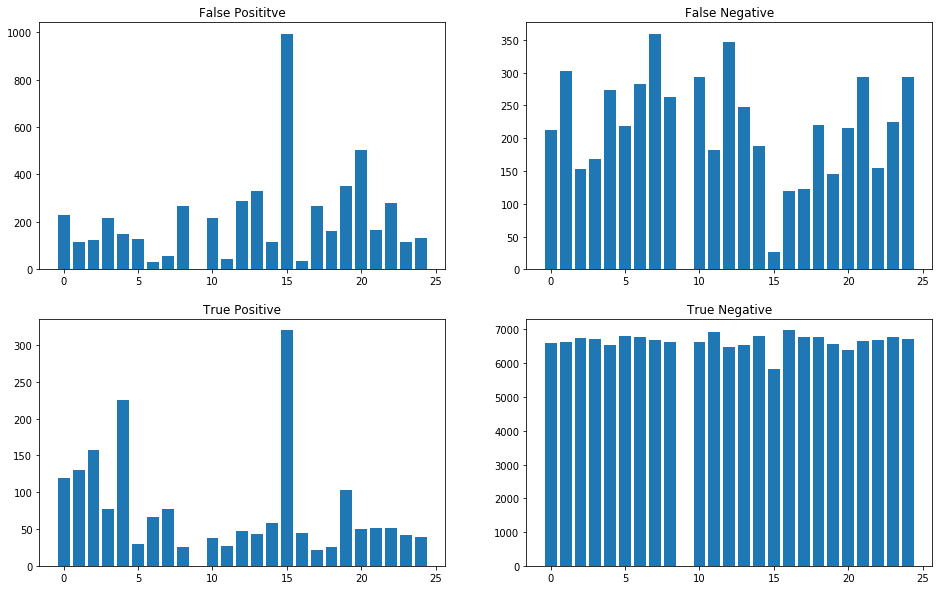

In [63]:
# Various Metrics
metrics(confusion_matrix(test_y, abc_predicted))

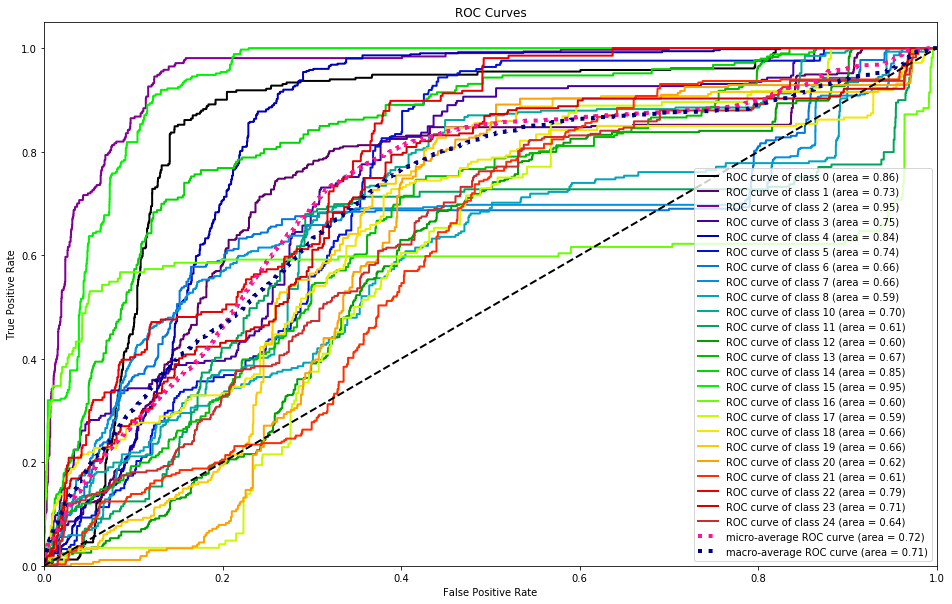

In [64]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, abc.predict_proba(test_X))

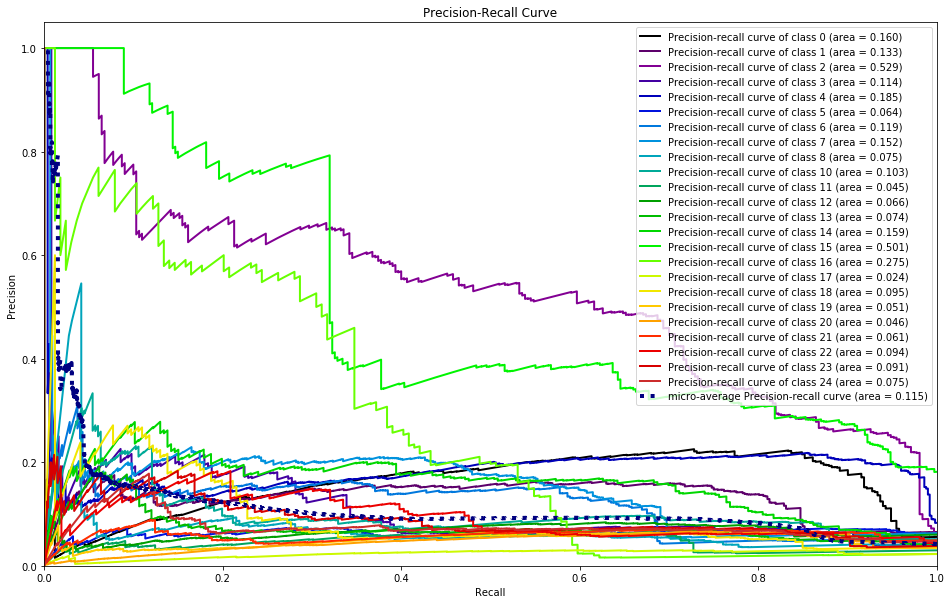

In [65]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, abc.predict_proba(test_X))

## K-Nearest Neighbor

In [66]:
knn = joblib.load(f'{path}\\knn.pkl')
print('knn loaded')

knn loaded


In [67]:
# Predict Results
knn_predicted = knn.predict(test_X)
# Calculate Accuracy
knn_acc = cal_acc(knn_predicted, test_y)

Correct Predictions : 5762
Incorrect Predictions : 1410
Accuracy = 80.34%


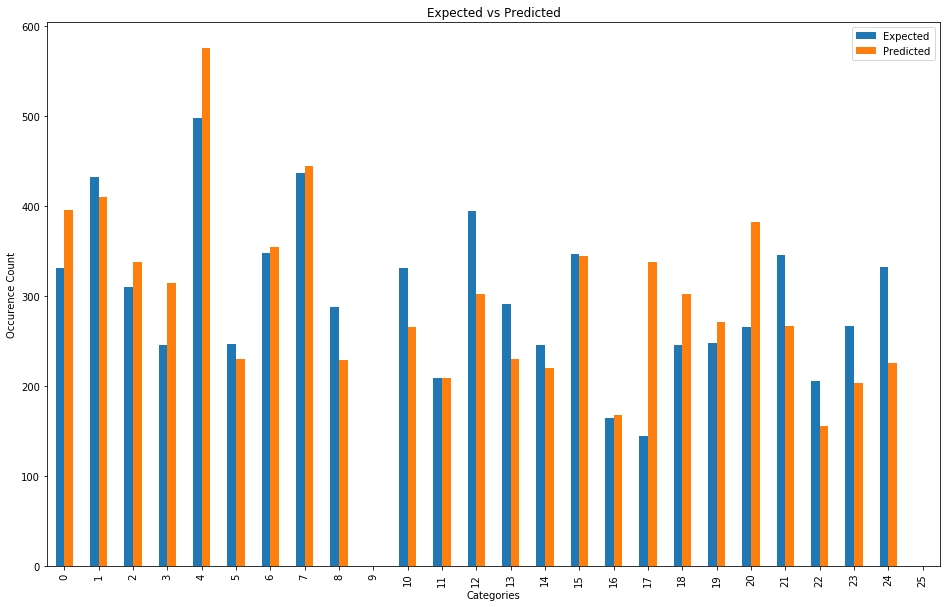

In [68]:
# Comparison graph for each category
evsp_graph(test_y, knn_predicted)

In [69]:
# Classification report
result = classification_report(test_y, knn_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       331
           1       0.94      0.89      0.91       432
           2       0.92      1.00      0.96       310
           3       0.74      0.95      0.83       245
           4       0.82      0.95      0.88       498
           5       0.97      0.90      0.94       247
           6       0.91      0.92      0.91       348
           7       0.96      0.98      0.97       436
           8       0.83      0.66      0.74       288
          10       0.75      0.60      0.67       331
          11       0.94      0.94      0.94       209
          12       0.84      0.64      0.73       394
          13       0.72      0.57      0.64       291
          14       0.99      0.88      0.93       246
          15       1.00      0.99      0.99       347
          16       0.98      1.00      0.99       164
          17       0.29      0.67      0.40       144
          18       0.65    

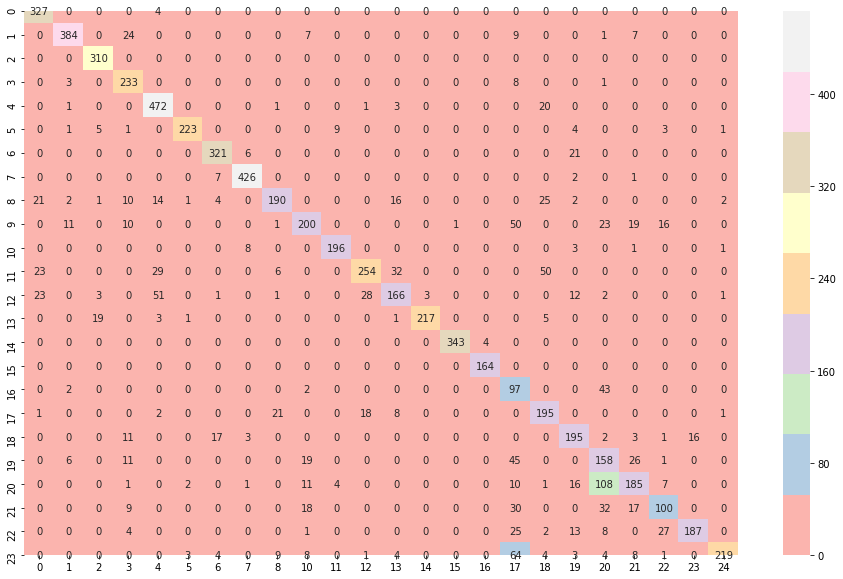

In [70]:
# confusion matrix
knn_cm = confusion_matrix(test_y, knn_predicted)
knn_cm = pd.DataFrame(knn_cm, columns=[x for x in range(25) if x != 9])
heatmap(knn_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [ 68  26  28  81 103   7  33  18  39  66  13  48  64   3   1   4 241 107
  76 224  82  56  16   6]

False Negative:
 [  4  48   0  12  26  24  27  10  98 131  13 140 125  29   4   0  47  51
  53 108 161 106  80 113]

True Positive:
 [327 384 310 233 472 223 321 426 190 200 196 254 166 217 343 164  97 195
 195 158 185 100 187 219]

True Negative:
 [6773 6714 6834 6846 6571 6918 6791 6718 6845 6775 6950 6730 6817 6923
 6824 7004 6787 6819 6848 6682 6744 6910 6889 6834]

True Positive Rate:
 [0.98791541 0.88888889 1.         0.95102041 0.94779116 0.90283401
 0.92241379 0.97706422 0.65972222 0.60422961 0.93779904 0.64467005
 0.57044674 0.88211382 0.98847262 1.         0.67361111 0.79268293
 0.78629032 0.59398496 0.53468208 0.48543689 0.70037453 0.65963855]

True Negative Rate:
 [0.99005993 0.99614243 0.99591956 0.98830663 0.98456698 0.99898917
 0.99516413 0.99732779 0.99433469 0.99035229 0.99813299 0.99291826
 0.99069903 0.99956685 0.99985348 0.99942922 0.96570859 0.98455

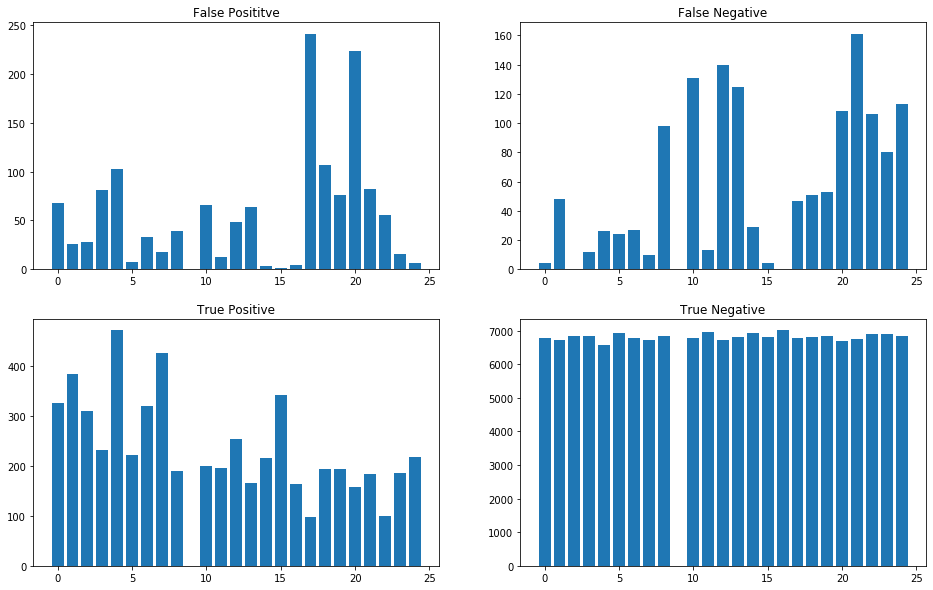

In [71]:
# Various Metrics
metrics(confusion_matrix(test_y, knn_predicted))

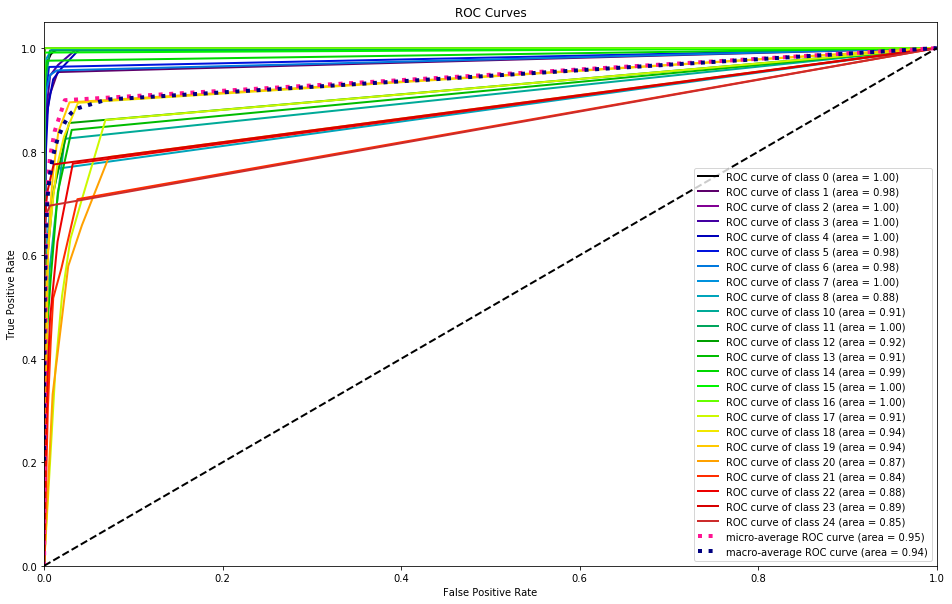

In [72]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, knn.predict_proba(test_X))

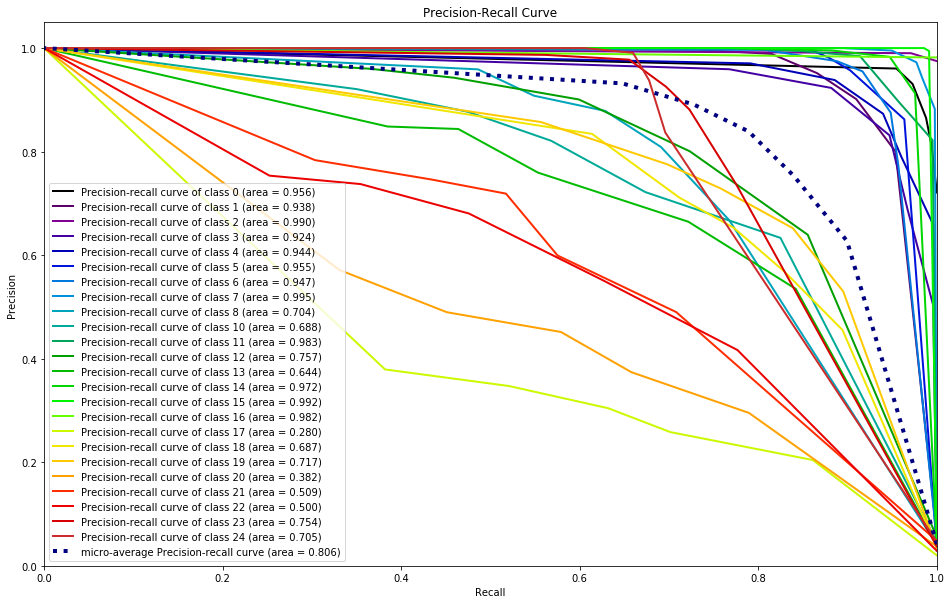

In [73]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, knn.predict_proba(test_X))

## XG Boost

In [74]:
xgb = joblib.load(f'{path}\\xgb.pkl')
print('xgb loaded')

xgb loaded


In [75]:
# Predict Results
xgb_predicted = xgb.predict(test_X)
# Calculate Accuracy
xgb_acc = cal_acc(xgb_predicted, test_y)

Correct Predictions : 5478
Incorrect Predictions : 1694
Accuracy = 76.38%


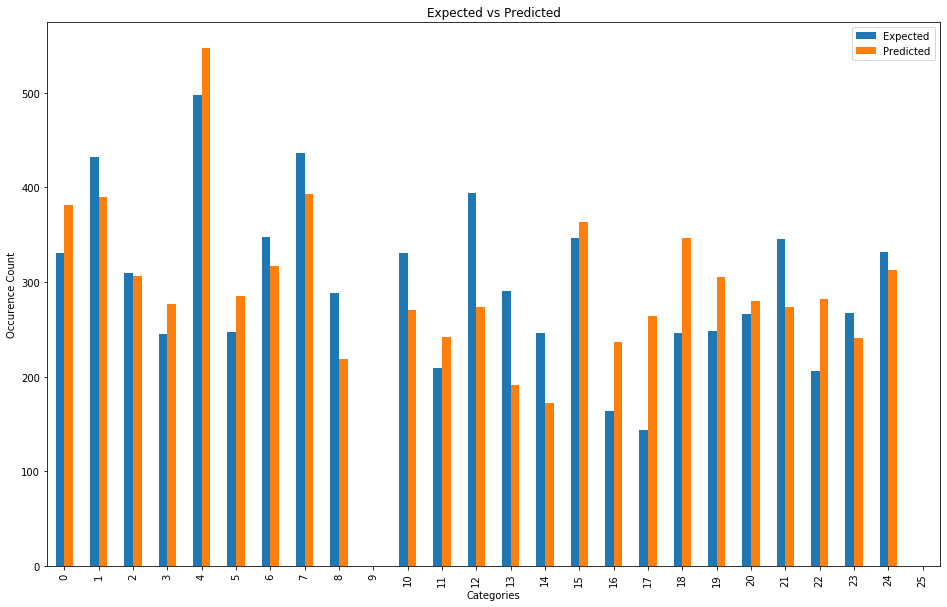

In [76]:
# Comparison graph for each category
evsp_graph(test_y, xgb_predicted)

In [77]:
# Classification report
result = classification_report(test_y, xgb_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       331
           1       0.97      0.88      0.92       432
           2       0.93      0.92      0.92       310
           3       0.87      0.98      0.92       245
           4       0.80      0.88      0.84       498
           5       0.81      0.94      0.87       247
           6       0.89      0.81      0.85       348
           7       0.97      0.88      0.92       436
           8       0.88      0.67      0.76       288
          10       0.79      0.64      0.71       331
          11       0.86      1.00      0.92       209
          12       0.80      0.56      0.66       394
          13       0.65      0.43      0.51       291
          14       0.97      0.67      0.79       246
          15       0.93      0.97      0.95       347
          16       0.65      0.93      0.76       164
          17       0.24      0.44      0.31       144
          18       0.42    

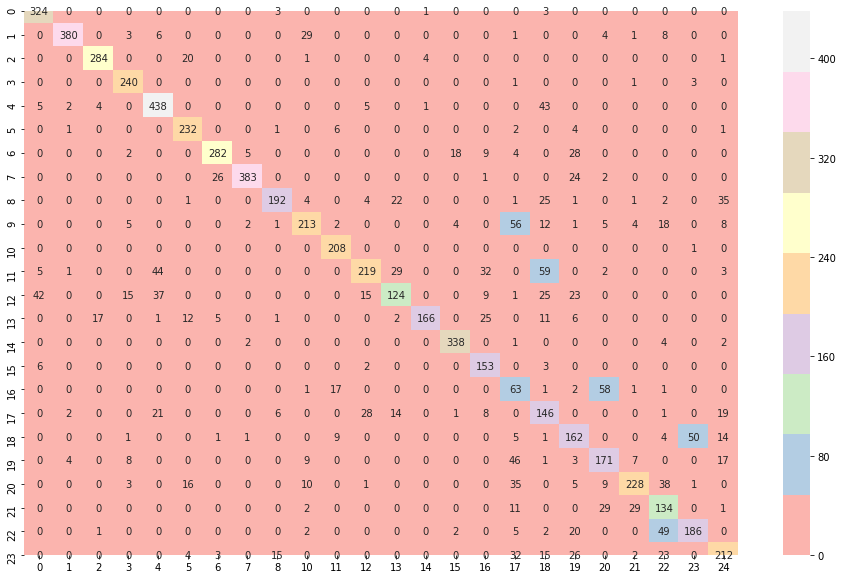

In [78]:
# confusion matrix
xgb_cm = confusion_matrix(test_y, xgb_predicted)
xgb_cm = pd.DataFrame(xgb_cm, columns=[x for x in range(25) if x != 9])
heatmap(xgb_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [ 58  10  22  37 109  53  35  10  27  58  34  55  67   6  25  84 201 201
 143 109  46 148  55 101]

False Negative:
 [  7  52  26   5  60  15  66  53  96 118   1 175 167  80   9  11  81 100
  86  95 118  72  81 120]

True Positive:
 [324 380 284 240 438 232 282 383 192 213 208 219 124 166 338 153  63 146
 162 171 228 134 186 212]

True Negative:
 [6783 6730 6840 6890 6565 6872 6789 6726 6857 6783 6929 6723 6814 6920
 6800 6924 6827 6725 6781 6797 6780 6818 6850 6739]

True Positive Rate:
 [0.97885196 0.87962963 0.91612903 0.97959184 0.87951807 0.93927126
 0.81034483 0.87844037 0.66666667 0.64350453 0.99521531 0.55583756
 0.42611684 0.67479675 0.9740634  0.93292683 0.4375     0.59349593
 0.65322581 0.64285714 0.65895954 0.65048544 0.69662921 0.63855422]

True Negative Rate:
 [0.99152171 0.99851632 0.99679394 0.99465858 0.98366797 0.99234657
 0.99487104 0.99851544 0.99607786 0.99152171 0.99511705 0.99188551
 0.99026304 0.9991337  0.996337   0.9880137  0.97140011 0.97097

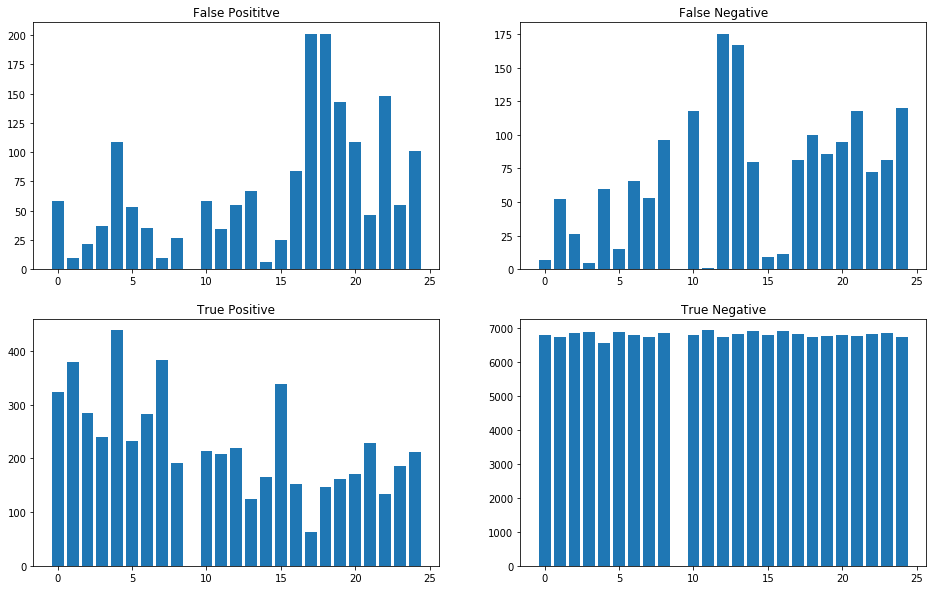

In [79]:
# Various Metrics
metrics(confusion_matrix(test_y, xgb_predicted))

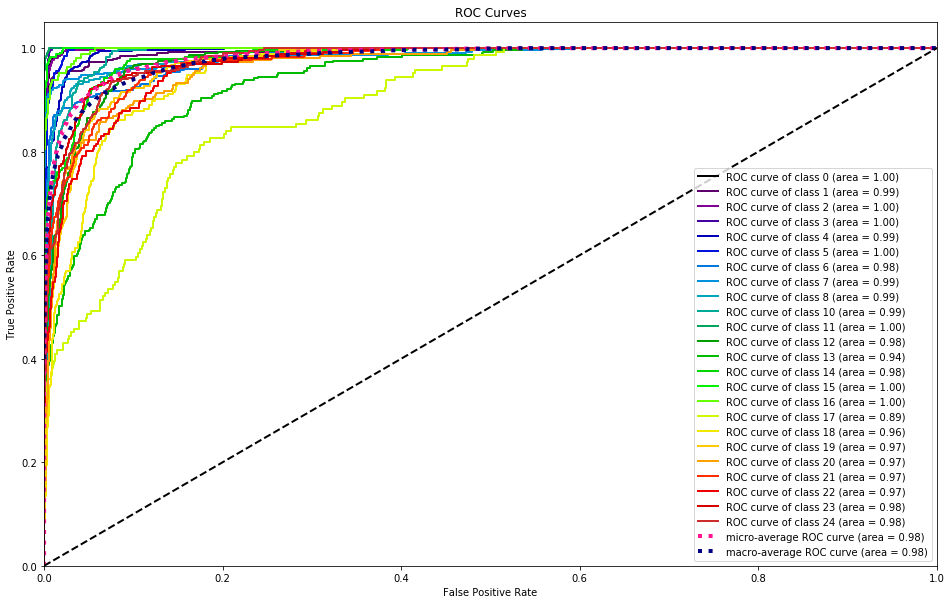

In [80]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, xgb.predict_proba(test_X))

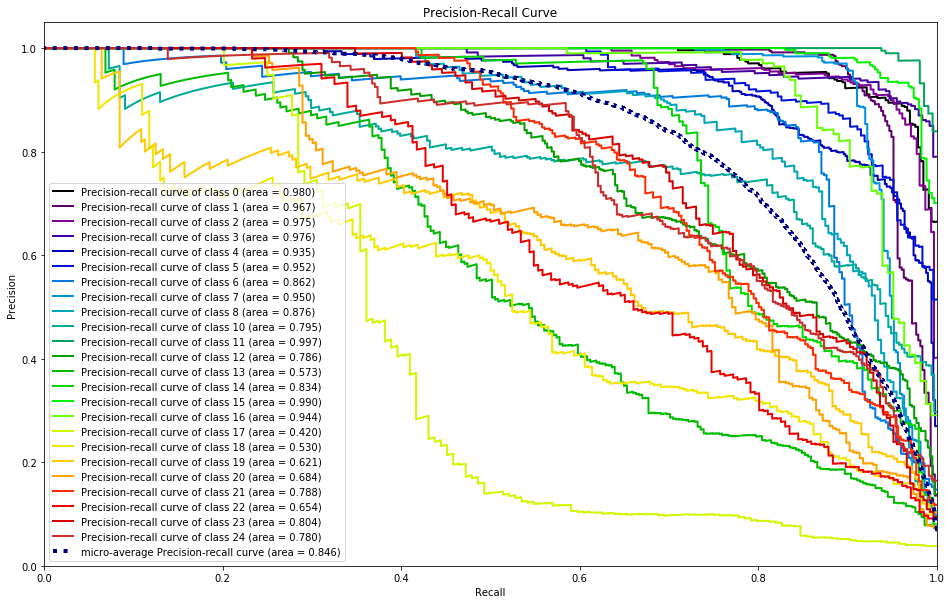

In [81]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, xgb.predict_proba(test_X))

## Support Vector

In [82]:
svc = joblib.load(f'{path}\\svc.pkl')
print('svc loaded')

svc loaded


In [83]:
# Predict Results
svc_predicted = svc.predict(test_X)
# Calculate Accuracy
svc_acc = cal_acc(svc_predicted, test_y)

Correct Predictions : 6038
Incorrect Predictions : 1134
Accuracy = 84.19%


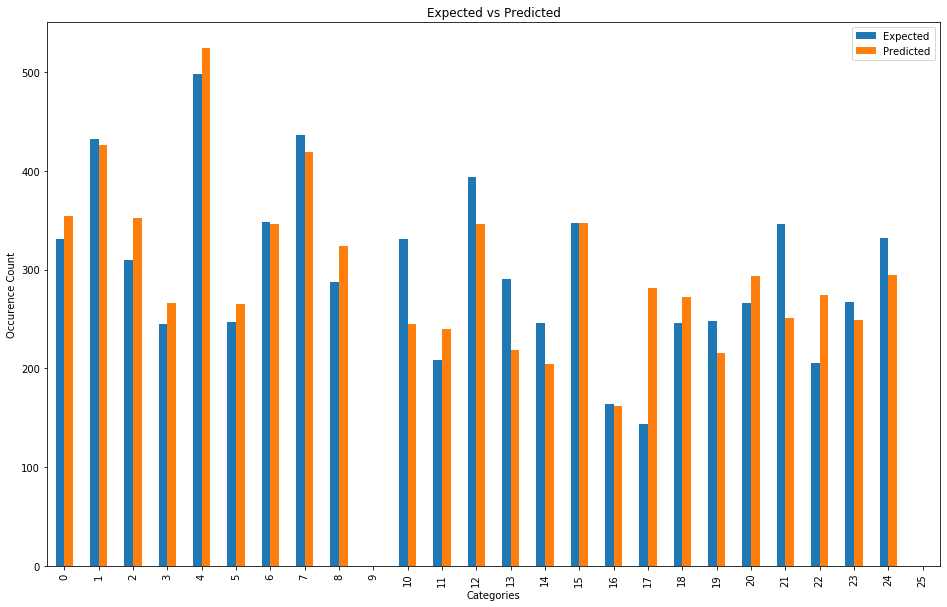

In [84]:
# Comparison graph for each category
evsp_graph(test_y, svc_predicted)

In [85]:
# Classification report
result = classification_report(test_y, svc_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.88      0.99      0.93       310
           3       0.92      1.00      0.95       245
           4       0.94      0.99      0.97       498
           5       0.78      0.83      0.80       247
           6       0.93      0.93      0.93       348
           7       0.98      0.94      0.96       436
           8       0.80      0.90      0.85       288
          10       0.79      0.59      0.67       331
          11       0.87      1.00      0.93       209
          12       0.85      0.75      0.79       394
          13       0.90      0.68      0.78       291
          14       0.99      0.83      0.90       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      0.99       164
          17       0.28      0.54      0.37       144
          18       0.71    

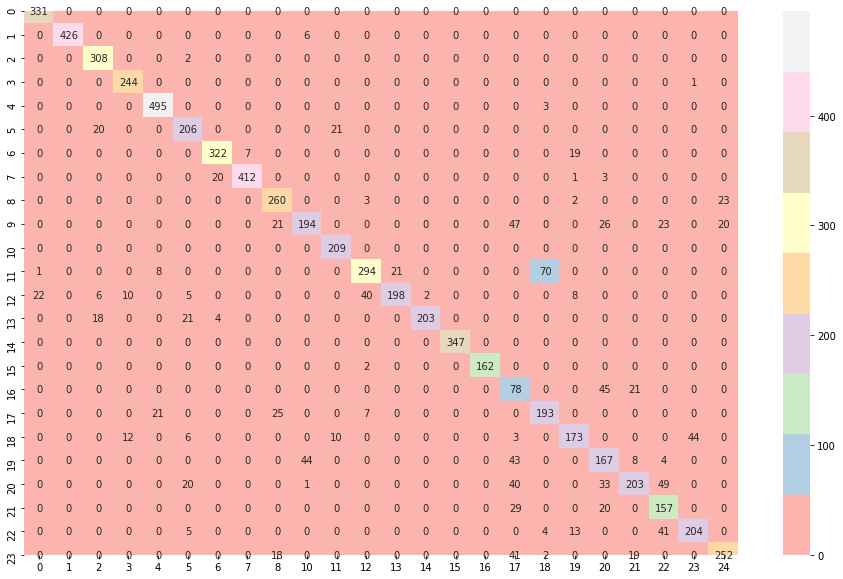

In [86]:
# confusion matrix
svc_cm = confusion_matrix(test_y, svc_predicted)
svc_cm = pd.DataFrame(svc_cm, columns=[x for x in range(25) if x != 9])
heatmap(svc_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [ 23   0  44  22  29  59  24   7  64  51  31  52  21   2   0   0 203  79
  43 127  48 117  45  43]

False Negative:
 [  0   6   2   1   3  41  26  24  28 137   0 100  93  43   0   2  66  53
  75  99 143  49  63  80]

True Positive:
 [331 426 308 244 495 206 322 412 260 194 209 294 198 203 347 162  78 193
 173 167 203 157 204 252]

True Negative:
 [6818 6740 6818 6905 6645 6866 6800 6729 6820 6790 6932 6726 6860 6924
 6825 7008 6825 6847 6881 6779 6778 6849 6860 6797]

True Positive Rate:
 [1.         0.98611111 0.99354839 0.99591837 0.9939759  0.8340081
 0.92528736 0.94495413 0.90277778 0.58610272 1.         0.74619289
 0.68041237 0.82520325 1.         0.98780488 0.54166667 0.78455285
 0.69758065 0.62781955 0.5867052  0.76213592 0.76404494 0.75903614]

True Negative Rate:
 [0.99663792 1.         0.99358788 0.99682402 0.99565478 0.99148014
 0.996483   0.99896081 0.99070308 0.99254495 0.9955479  0.99232812
 0.99694812 0.99971123 1.         1.         0.97111554 0.988593

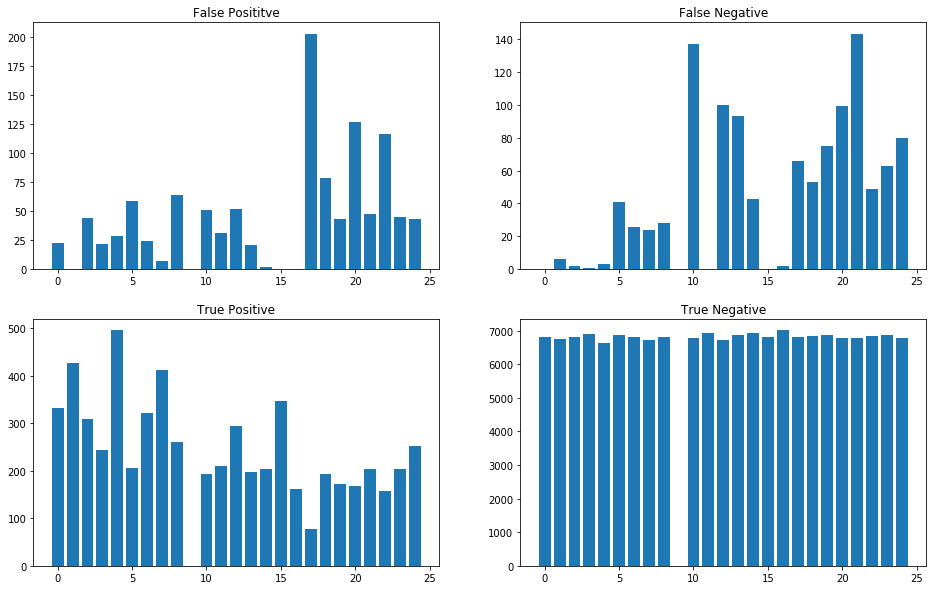

In [87]:
# Various Metrics
metrics(confusion_matrix(test_y, svc_predicted))

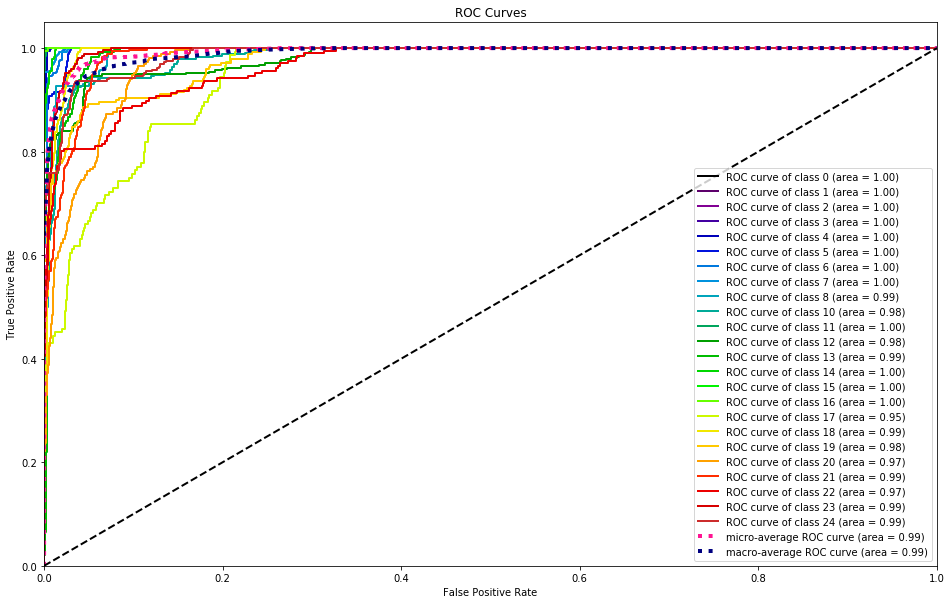

In [88]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, svc.predict_proba(test_X))

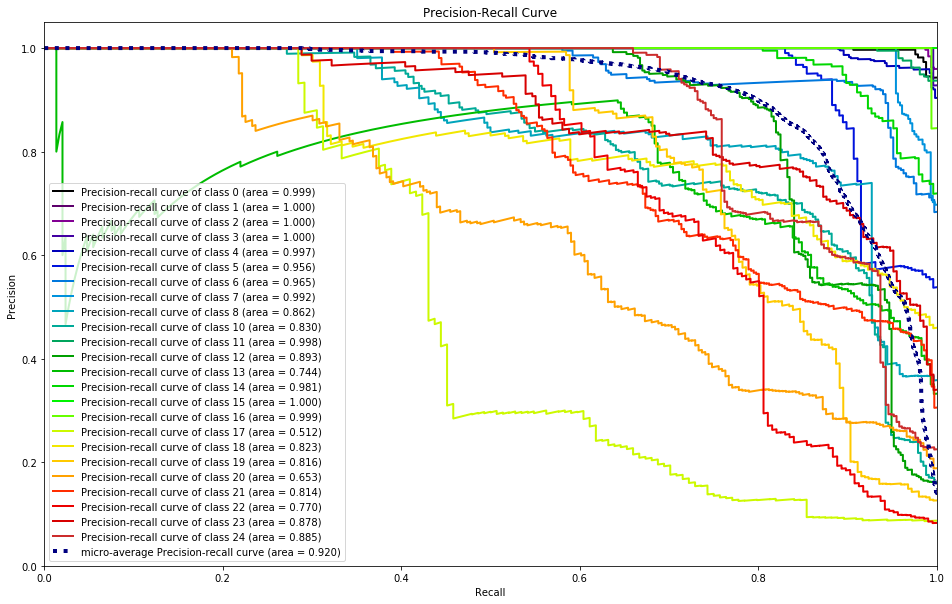

In [89]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, svc.predict_proba(test_X))

## Logistic Regression

In [90]:
lr = joblib.load(f'{path}\\lr.pkl')
print('Logistic Regression loaded')

Logistic Regression loaded


In [91]:
# Predict Results
lr_predicted = lr.predict(test_X)
# Calculate Accuracy
lr_acc = cal_acc(lr_predicted, test_y)

Correct Predictions : 4849
Incorrect Predictions : 2323
Accuracy = 67.61%


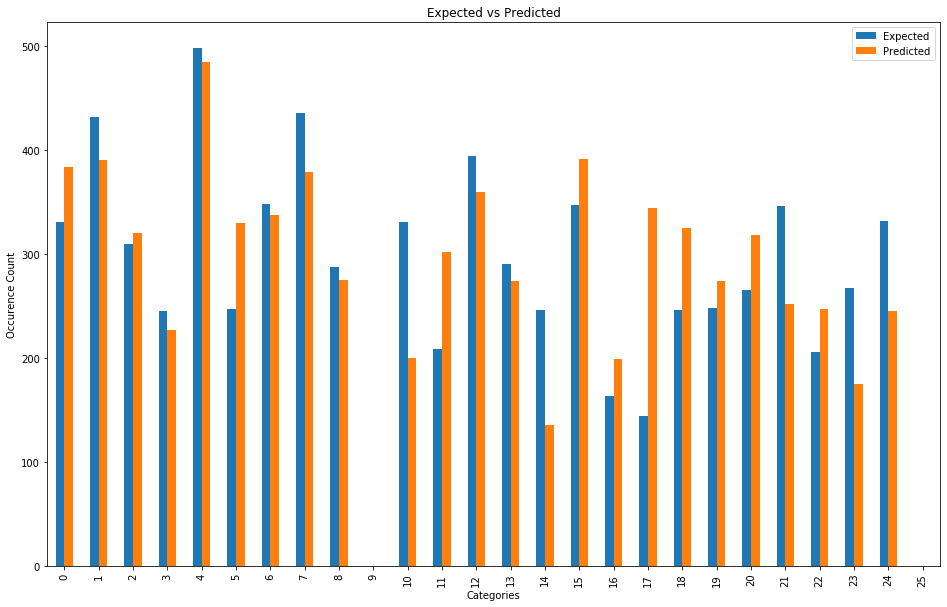

In [92]:
# Comparison graph for each category
evsp_graph(test_y, lr_predicted)

In [93]:
# Classification report
result = classification_report(test_y, lr_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       331
           1       0.99      0.90      0.94       432
           2       0.84      0.86      0.85       310
           3       0.91      0.84      0.88       245
           4       0.90      0.87      0.89       498
           5       0.68      0.91      0.78       247
           6       0.81      0.79      0.80       348
           7       0.78      0.67      0.72       436
           8       0.61      0.58      0.60       288
          10       0.52      0.31      0.39       331
          11       0.50      0.73      0.59       209
          12       0.77      0.70      0.73       394
          13       0.60      0.57      0.58       291
          14       1.00      0.55      0.71       246
          15       0.80      0.90      0.85       347
          16       0.61      0.74      0.67       164
          17       0.18      0.43      0.25       144
          18       0.37    

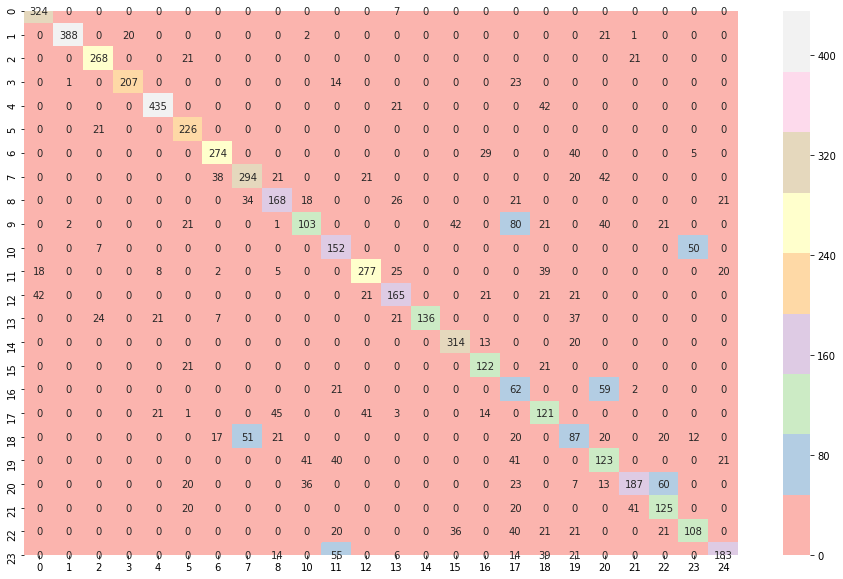

In [94]:
# confusion matrix
lr_cm = confusion_matrix(test_y, lr_predicted)
lr_cm = pd.DataFrame(lr_cm, columns=[x for x in range(25) if x != 9])
heatmap(lr_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [ 60   3  52  20  50 104  64  85 107  97 150  83 109   0  78  77 282 204
 187 195  65 122  67  62]

False Negative:
 [  7  44  42  38  63  21  74 142 120 228  57 117 126 110  33  42  82 125
 161 143 159  81 159 149]

True Positive:
 [324 388 268 207 435 226 274 294 168 103 152 277 165 136 314 122  62 121
  87 123 187 125 108 183]

True Negative:
 [6781 6737 6810 6907 6624 6821 6760 6651 6777 6744 6813 6695 6772 6926
 6747 6931 6746 6722 6737 6711 6761 6844 6838 6778]

True Positive Rate:
 [0.97885196 0.89814815 0.86451613 0.84489796 0.87349398 0.91497976
 0.78735632 0.67431193 0.58333333 0.31117825 0.72727273 0.70304569
 0.56701031 0.55284553 0.90489914 0.74390244 0.43055556 0.49186992
 0.35080645 0.46240602 0.54046243 0.60679612 0.40449438 0.55120482]

True Negative Rate:
 [0.99122935 0.9995549  0.99242203 0.99711275 0.99250824 0.98498195
 0.99062134 0.98738124 0.98445671 0.98582079 0.97845756 0.9877545
 0.98415928 1.         0.98857143 0.98901256 0.95987479 0.970545

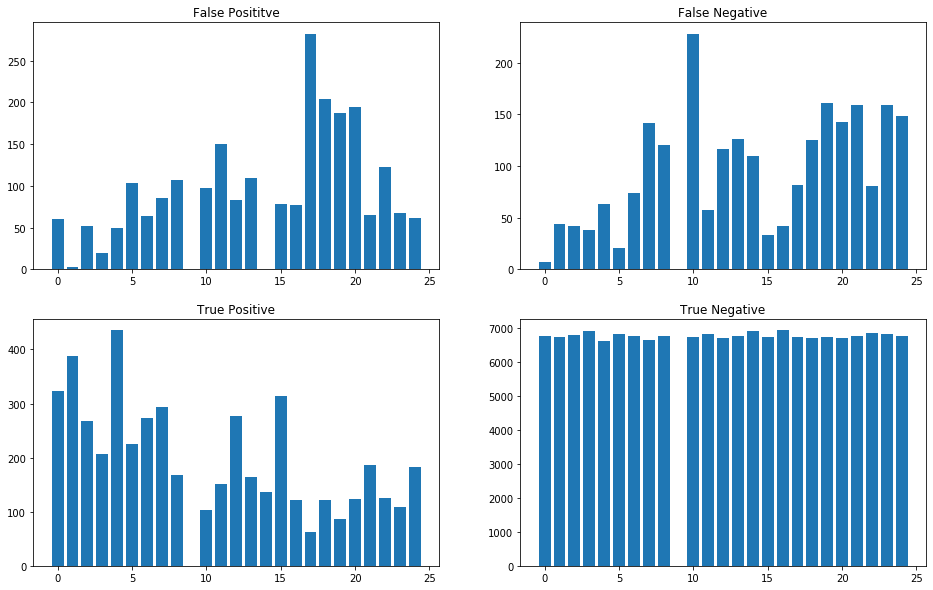

In [95]:
# Various Metrics
metrics(confusion_matrix(test_y, lr_predicted))

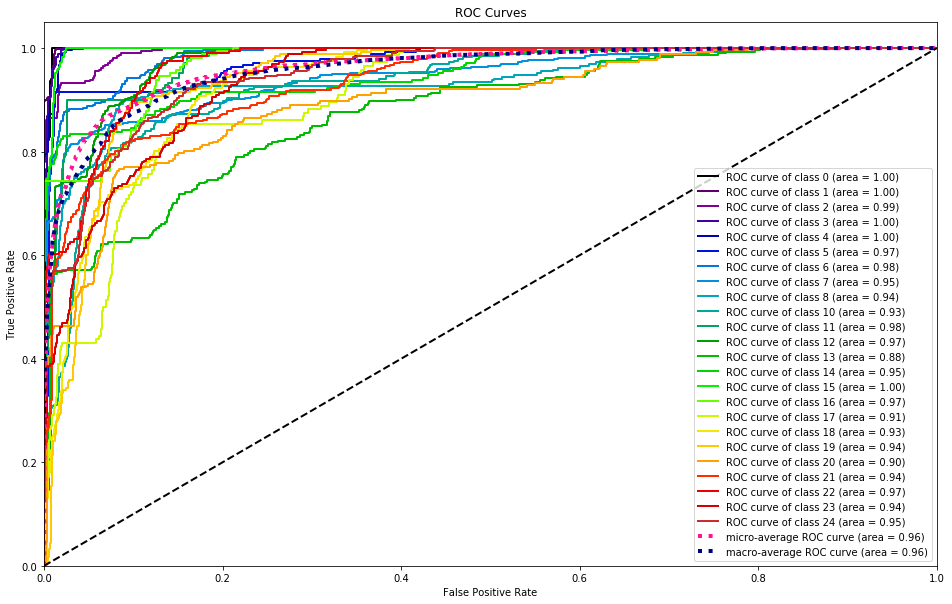

In [96]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, lr.predict_proba(test_X))

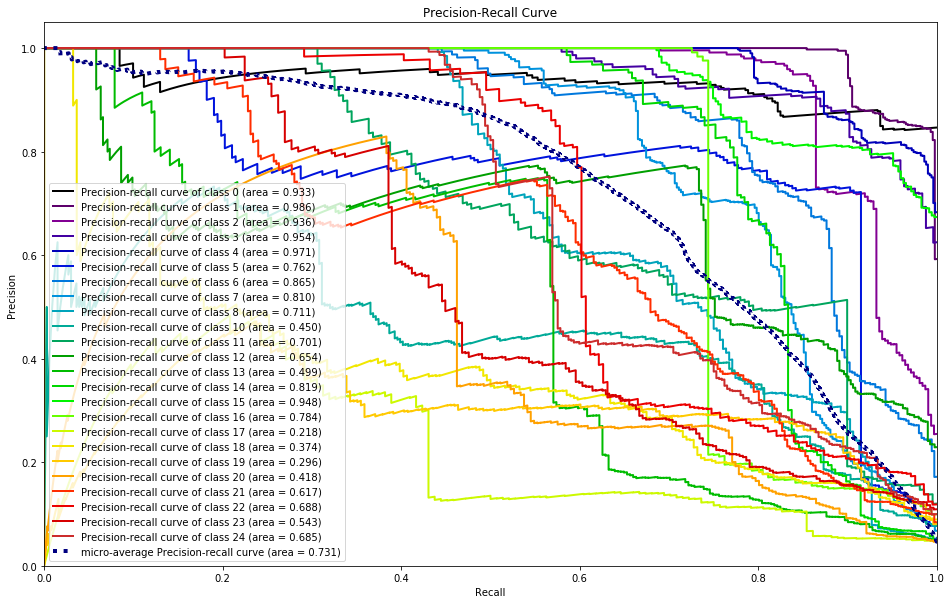

In [97]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, lr.predict_proba(test_X))

## Naive Bayes

In [98]:
gnb = joblib.load(f'{path}\\nb.pkl')
print('Naive Bayes loaded')

Naive Bayes loaded


In [99]:
# Predict Results
gnb_predicted = gnb.predict(test_X)
# Calculate Accuracy
gnb_acc = cal_acc(gnb_predicted, test_y)

Correct Predictions : 3373
Incorrect Predictions : 3799
Accuracy = 47.03%


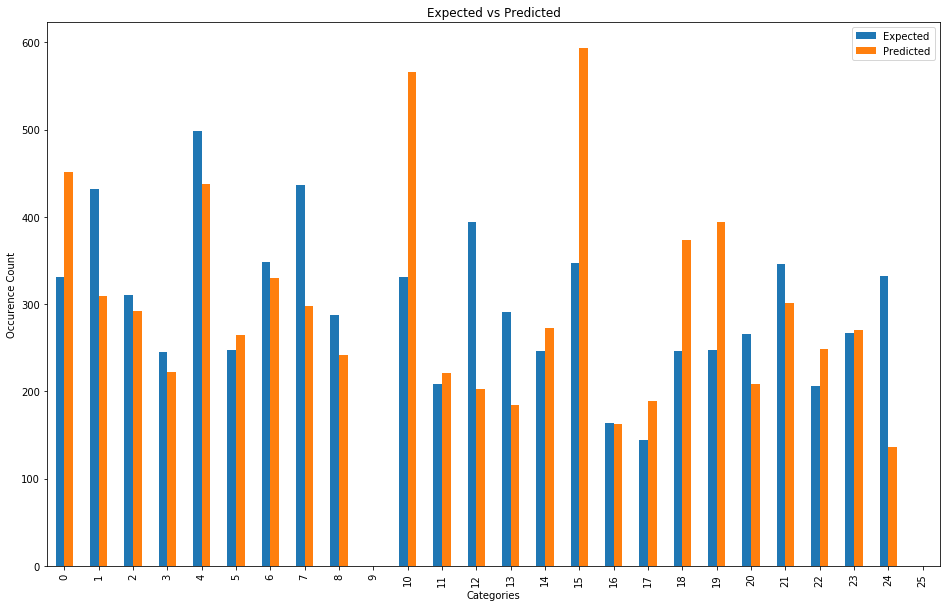

In [100]:
# Comparison graph for each category
evsp_graph(test_y, gnb_predicted)

In [101]:
# Classification report
result = classification_report(test_y, gnb_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.57      0.78      0.66       331
           1       0.91      0.65      0.76       432
           2       0.65      0.62      0.63       310
           3       0.48      0.43      0.45       245
           4       0.75      0.66      0.70       498
           5       0.46      0.49      0.48       247
           6       0.50      0.47      0.49       348
           7       0.84      0.58      0.68       436
           8       0.26      0.22      0.24       288
          10       0.31      0.53      0.39       331
          11       0.64      0.68      0.66       209
          12       0.36      0.19      0.25       394
          13       0.35      0.22      0.27       291
          14       0.47      0.52      0.50       246
          15       0.45      0.76      0.56       347
          16       0.74      0.74      0.74       164
          17       0.37      0.48      0.41       144
          18       0.10    

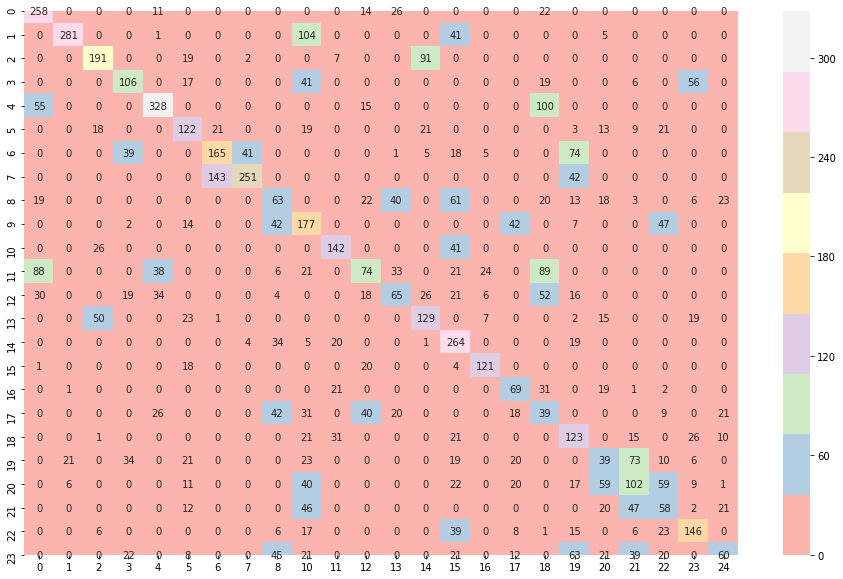

In [102]:
# confusion matrix
gnb_cm = confusion_matrix(test_y, gnb_predicted)
gnb_cm = pd.DataFrame(gnb_cm, columns=[x for x in range(25) if x != 9])
heatmap(gnb_cm, annot=True, fmt='d', cmap='Pastel1')


False Positive:
 [ 33  13  11  21  55  19  21   4  40  76  49  37  35   2  27  12 198 142
 132  72  28 140  33  20]

False Negative:
 [  0  28   1   5  15  21  47  26  61 104   0 124 106  26   0   0  58  34
  48 102 148  63  70 133]

True Positive:
 [331 404 309 240 483 226 301 410 227 227 209 270 185 220 347 164  86 212
 200 164 198 143 197 199]

True Negative:
 [6808 6727 6851 6906 6619 6906 6803 6732 6844 6765 6914 6741 6846 6924
 6798 6996 6830 6784 6792 6834 6798 6826 6872 6820]

True Positive Rate:
 [1.         0.93518519 0.99677419 0.97959184 0.96987952 0.91497976
 0.86494253 0.94036697 0.78819444 0.6858006  1.         0.68527919
 0.63573883 0.89430894 1.         1.         0.59722222 0.86178862
 0.80645161 0.61654135 0.57225434 0.69417476 0.73782772 0.59939759]

True Negative Rate:
 [0.99517614 0.99807122 0.99839697 0.99696838 0.99175907 0.99725632
 0.99692263 0.99940618 0.99418942 0.98889051 0.9929628  0.99454116
 0.99491353 0.99971123 0.99604396 0.99828767 0.97182698 0.97949

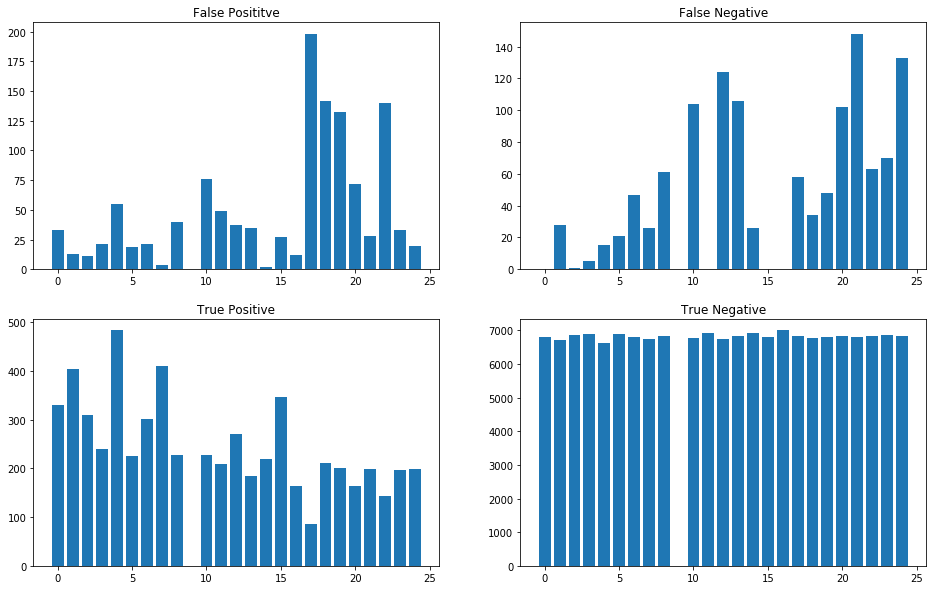

In [103]:
# Various Metrics
metrics(confusion_matrix(test_y, rfc_predicted))


False Positive:
 [193  28 101 116 110 143 165  47 179 389  79 129 120 144 329  42 120 334
 271 170 199 191 124  76]

False Negative:
 [ 73 151 119 139 170 125 183 185 225 154  67 320 226 117  83  43  75 207
 125 227 244 148 121 272]

True Positive:
 [258 281 191 106 328 122 165 251  63 177 142  74  65 129 264 121  69  39
 123  39 102  58 146  60]

True Negative:
 [6648 6712 6761 6811 6564 6782 6659 6689 6705 6452 6884 6649 6761 6782
 6496 6966 6908 6592 6653 6736 6627 6775 6781 6764]

True Positive Rate:
 [0.77945619 0.65046296 0.61612903 0.43265306 0.65863454 0.49392713
 0.47413793 0.57568807 0.21875    0.5347432  0.67942584 0.18781726
 0.2233677  0.52439024 0.76080692 0.73780488 0.47916667 0.15853659
 0.49596774 0.14661654 0.29479769 0.2815534  0.54681648 0.18072289]

True Negative Rate:
 [0.97178775 0.9958457  0.98528126 0.98325393 0.98351813 0.97935018
 0.97582063 0.99302257 0.97399768 0.94313697 0.98865432 0.98096784
 0.98256067 0.97920878 0.95179487 0.99400685 0.98292544 0.95177

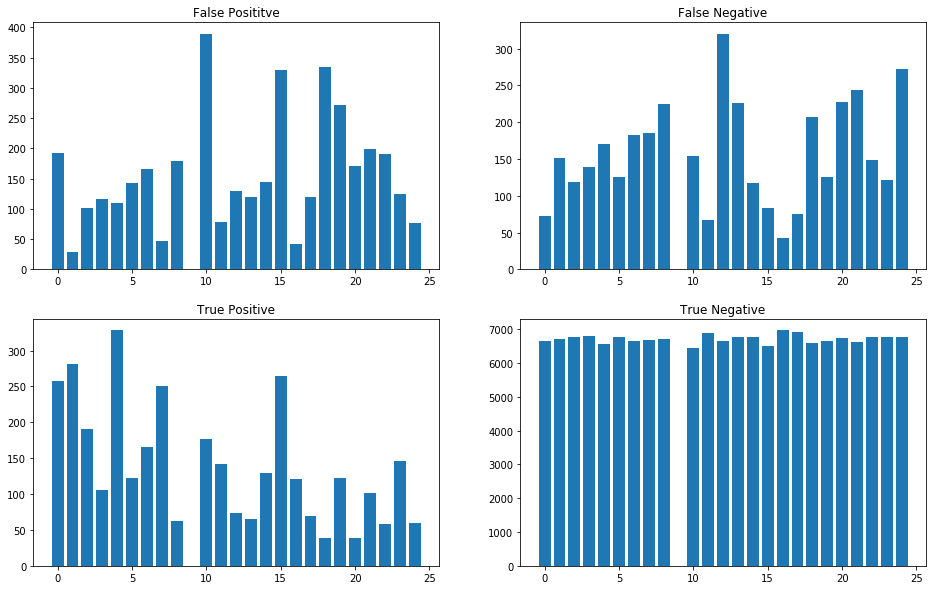

In [104]:
# Various Metrics
metrics(confusion_matrix(test_y, gnb_predicted))

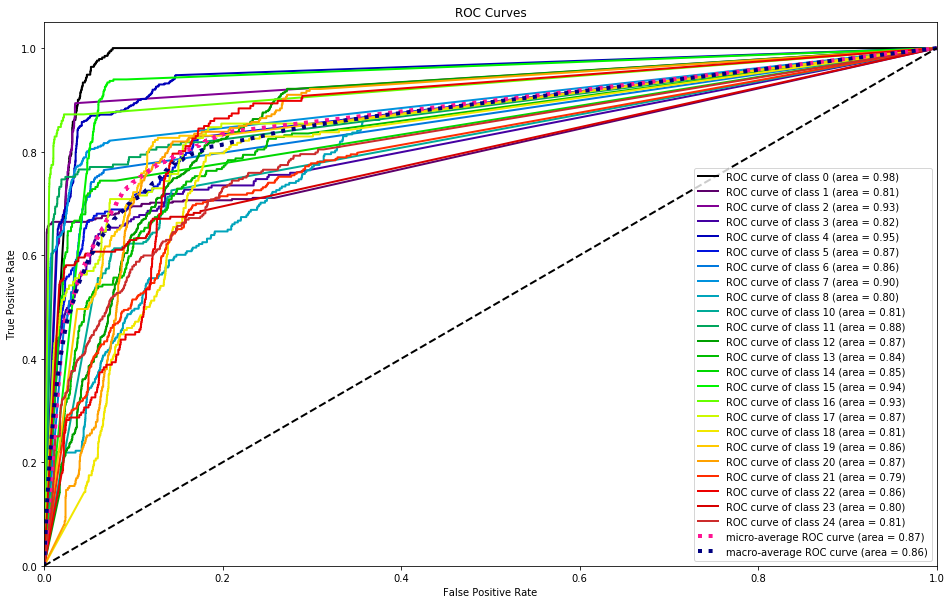

In [105]:
# Plotting ROC
skplt.metrics.plot_roc(test_y, gnb.predict_proba(test_X))

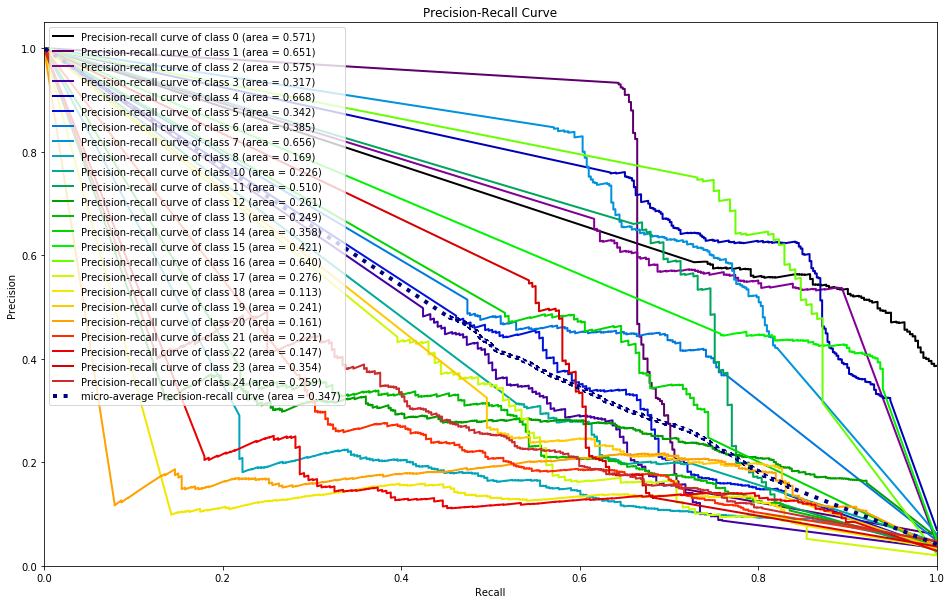

In [106]:
# Plotting Precision Recall
skplt.metrics.plot_precision_recall(test_y, gnb.predict_proba(test_X))

# Training Models

In [107]:
'''
# Random Forest
print('RANDOM FOREST')
rfc = RandomForestClassifier(n_estimators=500, random_state=21)
rfc.fit(X, y)
rfc_predicted = rfc.predict(test_X)
cal_acc(rfc_predicted, test_y)
'''

"\n# Random Forest\nprint('RANDOM FOREST')\nrfc = RandomForestClassifier(n_estimators=500, random_state=21)\nrfc.fit(X, y)\nrfc_predicted = rfc.predict(test_X)\ncal_acc(rfc_predicted, test_y)\n"

In [108]:
'''
# AdaBoost
print('ADA BOOST')
abc = AdaBoostClassifier(n_estimators=500, random_state=0)
abc.fit(X, y)
abc_predicted = abc.predict(test_X)
cal_acc(abc_predicted, test_y)
'''

"\n# AdaBoost\nprint('ADA BOOST')\nabc = AdaBoostClassifier(n_estimators=500, random_state=0)\nabc.fit(X, y)\nabc_predicted = abc.predict(test_X)\ncal_acc(abc_predicted, test_y)\n"

In [109]:
'''
# KNN
print('KNN')
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X, y)
knn_predicted = knn.predict(test_X)
cal_acc(knn_predicted, test_y)
'''

"\n# KNN\nprint('KNN')\nknn = KNeighborsClassifier(n_neighbors=5, p=1)\nknn.fit(X, y)\nknn_predicted = knn.predict(test_X)\ncal_acc(knn_predicted, test_y)\n"

In [110]:
'''
# XGB Classifier
print('XGB')
xgb = XGBClassifier()
xgb.fit(X, y)
xgb_predicted = xgb.predict(test_X)
cal_acc(xgb_predicted, test_y)
'''

"\n# XGB Classifier\nprint('XGB')\nxgb = XGBClassifier()\nxgb.fit(X, y)\nxgb_predicted = xgb.predict(test_X)\ncal_acc(xgb_predicted, test_y)\n"

In [111]:
'''
# Support Vector
print('SVC')
svc = SVC(random_state=0, probability=True)
svc.fit(X, y)
svc_predicted = svc.predict(test_X)
cal_acc(svc_predicted, test_y)
'''

"\n# Support Vector\nprint('SVC')\nsvc = SVC(random_state=0, probability=True)\nsvc.fit(X, y)\nsvc_predicted = svc.predict(test_X)\ncal_acc(svc_predicted, test_y)\n"

In [112]:
'''
# Logistic Regression
print('Logistic Regression')
lr = LogisticRegression(max_iter=5000, random_state=21)
lr.fit(X, y)
lr_predicted = lr.predict(test_X)
cal_acc(lr_predicted, test_y)
'''

"\n# Logistic Regression\nprint('Logistic Regression')\nlr = LogisticRegression(max_iter=5000, random_state=21)\nlr.fit(X, y)\nlr_predicted = lr.predict(test_X)\ncal_acc(lr_predicted, test_y)\n"

In [113]:
'''
# Naive Bayes
print('Naive Bayes')
gnb = MultinomialNB()
gnb.fit(X, y)
gnb_predicted = gnb.predict(test_X)
cal_acc(gnb_predicted, test_y)
'''

"\n# Naive Bayes\nprint('Naive Bayes')\ngnb = MultinomialNB()\ngnb.fit(X, y)\ngnb_predicted = gnb.predict(test_X)\ncal_acc(gnb_predicted, test_y)\n"

# Saving Trained Models

In [114]:
'''
# Saving the model
joblib.dump(rfc, 'rfc.pkl')
print('rfc Saved')
joblib.dump(abc, 'abc.pkl')
print('abc Saved')
joblib.dump(knn, 'knn.pkl')
print('knn Saved')
joblib.dump(xgb, 'xgb.pkl')
print('xgb Saved')
joblib.dump(svc, 'svc.pkl')
print('svc Saved')
joblib.dump(lr, 'lr.pkl')
print('logistic Regression Saved')
joblib.dump(gnb, 'nb.pkl')
print('Naive Bayes Saved')
'''

"\n# Saving the model\njoblib.dump(rfc, 'rfc.pkl')\nprint('rfc Saved')\njoblib.dump(abc, 'abc.pkl')\nprint('abc Saved')\njoblib.dump(knn, 'knn.pkl')\nprint('knn Saved')\njoblib.dump(xgb, 'xgb.pkl')\nprint('xgb Saved')\njoblib.dump(svc, 'svc.pkl')\nprint('svc Saved')\njoblib.dump(lr, 'lr.pkl')\nprint('logistic Regression Saved')\njoblib.dump(gnb, 'nb.pkl')\nprint('Naive Bayes Saved')\n"

# Accuracy Comparison of all Models

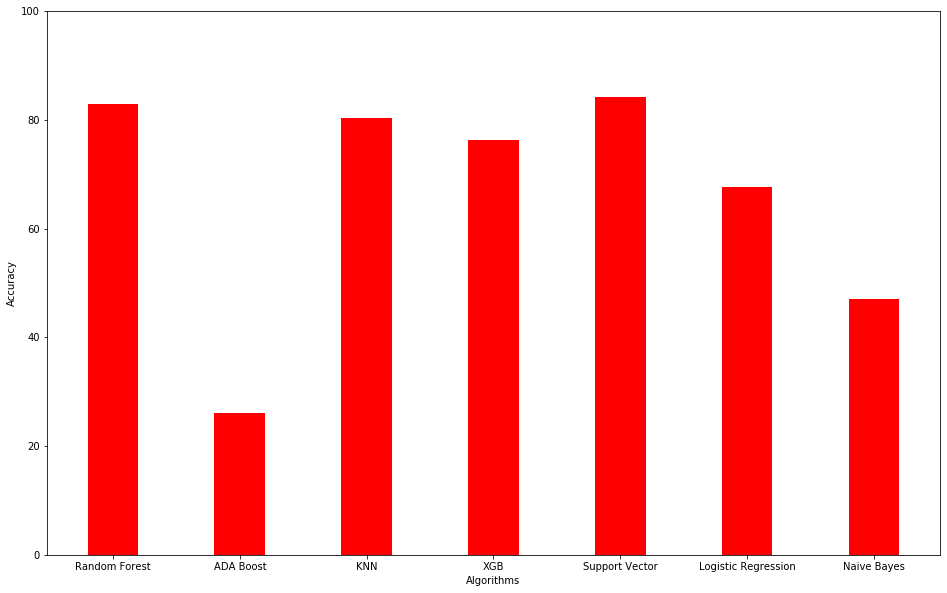

In [115]:
# Accuracy Comparison Graph
acc_list = [rfc_acc, abc_acc, knn_acc, xgb_acc, svc_acc, lr_acc, gnb_acc]
models = ['Random Forest', 'ADA Boost', 'KNN', 'XGB', 'Support Vector', 'Logistic Regression', 'Naive Bayes']

plt.ylim(0, 100)
plt.bar(models, acc_list, width=0.4, color='red')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()